<a href="https://colab.research.google.com/github/mohIITech/learning_machine_learning/blob/main/course_iml/lab1_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q2
Consider a matrix B = A + A

⊤, where A ∈ R

100×100 is a matrix such that (i, j) entries aij

follow a Gaussian distribution with zero mean and variance equal to σ
2
.

(a) Write a python program to find the eigenvalue-eigenvector decomposition (EVD) of B = VDV⊤.
You can use an inbuilt function to find the EVD. Here, the matrix V =

v1 v2 . . . vn

∈ R
n×n

contains the eigenvectors vi

’s as its columns.The matrix D = diag(

λ1 λ2 . . . λn

) contains the

eigenvalues λi

’s as its diagonal entries. Ensure that λ1 ≥ λ2 ≥ · · · ≥ λn. Take σ
2 = 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# forbenius norm calculation function
def forb_norm(matrix):
  sum = 0
  rows = matrix.shape[0]
  cols = matrix.shape[1]
  for i in range(rows):
    for j in range(cols):
      sum += (matrix[i][j])**2
  sum = (sum)**0.5
  return sum

In [3]:
# making the matrix B

A = np.random.normal(loc=0, scale=1, size=(100, 100))
B = A + np.transpose(A)

# making matrix V, D
eigenvalues, eigenvectors = np.linalg.eig(B)
V, D = eigenvectors, eigenvalues

# we need to sort both eigenvalues and eigenvectors otherwise their pair mismatches

idx = np.argsort(eigenvalues)[::-1] # in descending order

D = eigenvalues[idx]
V = eigenvectors[:, idx]
diag_D = np.diag(D) # a diagonal matrix

(b) Write a code to find the matrix Bk =
P
k
i=1
λiviv
⊤
i
and ∥B − Bk∥F for k ∈ {1, 2, . . . , n}. Take σ
2 = 1.

In [4]:
# EVD(eigenvalue-eigenvector decomposition)
EVD_B = np.matmul(np.matmul(V, diag_D), V.T)

In [5]:
# finding the matrix B_k through a function
def find_B_k(k, V, D):
  v = [V[:, i] for i in range(100)]

  sum = np.zeros((100, 100))

  for i in range(k):
    v[i] = v[i].reshape(-1, 1) # making the 1D array into 2d matrix for sum calculation as matmul otherwise it would be using outer product
    sum += D[i] * (v[i] @ v[i].T)

  return sum

forb_norm((B - find_B_k(100, V, D)))

np.float64(1.6268133918290012e-12)

 (c) Plot ∥B − Bk∥F vs k. Write your observations from this plot regarding how many eigenvalues and
eigenvectors do we need to ensure that Bk is approximately similar to B. Take σ

2 = 1. Take σ
2 = 1.

Text(0.5, 1.0, 'Frobenius Norm of (B - B_k) vs k')

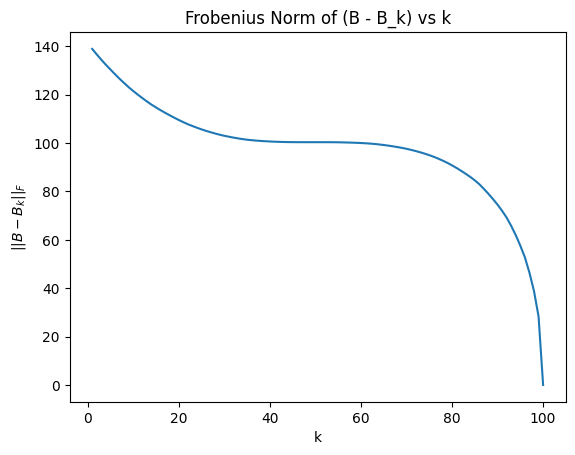

In [6]:
import matplotlib.pyplot as plt

# plotting
values = []
for k in range(1, 101):
  B_k = find_B_k(k, V, D)
  diff = B - B_k
  value = forb_norm(diff)
  values.append(value)

plt.plot(range(1, 101), values)
plt.xlabel('k')
plt.ylabel(r'$||B - B_k||_F$')
plt.title('Frobenius Norm of (B - B_k) vs k')

(d) Write a code to find ∥V

⊤V − I∥F, where I is the identity matrix. Take σ
2 = 1.

In [7]:
I = np.identity(100) # 100*100 identity matrix
que_d = forb_norm((V.T @ V) - I)
que_d

np.float64(1.0965158852621307e-13)

(e) Plot ∥B − Bk∥F vs σ

2 ∈ {0, 0.01, 0.02, . . . , 1.00} for k = 5, 10, 20, 25, 30.

In [8]:
sigma_squares = np.arange(0, 1.01, 0.01)
k_values = [5, 10, 20, 25, 30]
values_2 = {k: [] for k in k_values}

for sigma2 in sigma_squares:
  # making the matrix B for every sigma2

  A = np.random.normal(0, np.sqrt(sigma2), (100, 100))
  B = A + np.transpose(A)

# making matrix V, D
  eigenvalues, eigenvectors = np.linalg.eig(B)
# we need to sort both eigenvalues and eigenvectors otherwise their pair mismatches

  idx = np.argsort(eigenvalues)[::-1] # in descending order

  D = eigenvalues[idx]
  V = eigenvectors[:, idx]

  for k in k_values:
    value_2 = forb_norm(B - find_B_k(k, V, D))
    values_2[k].append(value_2)


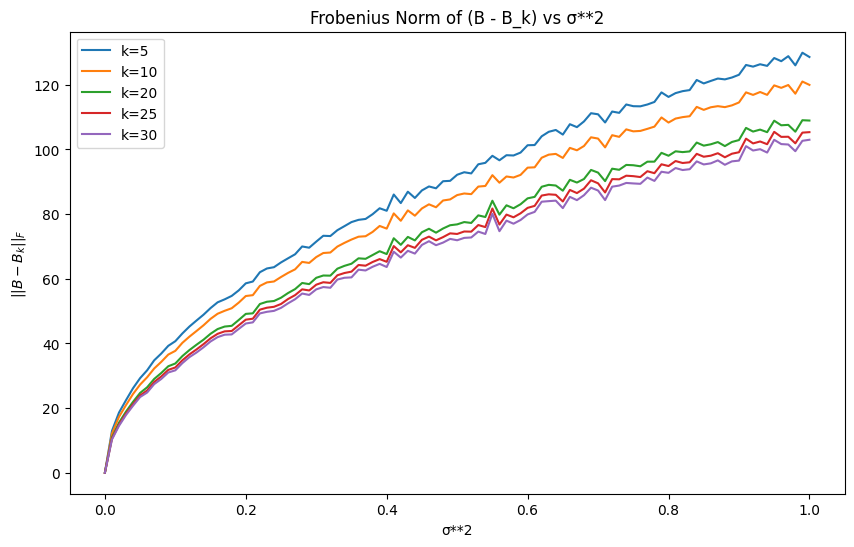

In [9]:
# plotting
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(sigma_squares, values_2[k], label=f'k={k}')

plt.xlabel('σ**2')
plt.ylabel(r'$||B - B_k||_F$')
plt.title('Frobenius Norm of (B - B_k) vs σ**2')
plt.legend()